# The Battle of Neighborhood

## Business Problem

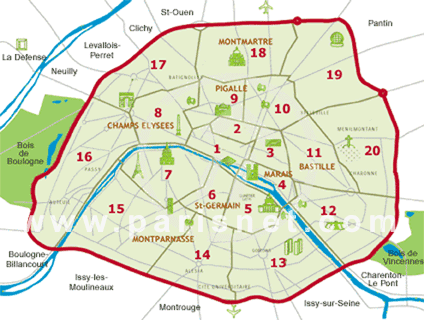

Paris is the capital and most populous city of France, with an area of 105 square kilometres (41 square miles) and an official estimated population of 2,140,526 residents as of 1 January 2019. Since the 17th century, Paris has been one of Europe's major centres of finance, diplomacy, commerce, fashion, science, and the arts. The City of Paris is the centre and seat of government of the Île-de-France, or Paris Region, which has an estimated official 2019 population of 12,213,364, or about 18 percent of the population of France.

The 20th (or XXe or vingtième) arrondissement of Paris is the last of the consecutively numbered arrondissements of the capital city of France. Also known as Ménilmontant, it is located on the right bank of the River Seine and contains the city's cosmopolitan districts Ménilmontant and Belleville. The 20th arrondissement is also internationally known for the Père Lachaise Cemetery where one can find the tombs of many famous artists. 

Our client is an entrepreneur who loves books and who wants to open a book store in the 20th arrondissement of Paris. He would like to know exactly where he can open the book store. He wants a place where the demand is high and where no many book stores are already operating.
To do so, he asked us to study the 20th arrondissement and more precisely:
    1. Define areas with low number of book stores already opened
    2. Among them, define attractive area to open the store. He would like to have schools/university close to his place because he loves to share his knowledge and recommendations.
    3. Provide any insight on these locations (workplace, schools...) that might attract customers

## Data

To solve the business problem, we would require the following data:
    1. Details about the 20th arrondissement such as population (Wikipedia)
    2. List of book shops in the 20th arrondissement, per zone (Foursquare)
    3. List of schools/colleges/universities in the area with their addresses(Foursquare)
    4. List of the transportation accessibility to ease customer venue(Foursquare)
    5. Details of the surroundings (venues) of the top places to open the store (Foursquare)

The data will be used as follows:
    1. Use Foursquare and geopy data to map all the book stores in the 20th arrondissement
    2. Use Foursquare and geopy data to map all the schools/college/university
    3. Create a map that depicts the spread of the above
    4. Study the map and define top locations for the book shop location
    
The procesing of these DATA will allow to answer the key questions to make a decision:
    1. What is the best location that meets criteria established
    2. What is the distances from interesting venues

# Study

## Visualisation of the 20th Arrondissement on the Map

In [1]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
import requests 
import pandas as pd 
import numpy as np 
import random 
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-he774522_2
  - anaconda::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-he774522_2
  - anaconda::openssl-1.1.1d-he774522_2, defaults::ca-certificates-2019.8.28-0
  - defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-he774522_2done

# All requested packages already installed.

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-he774522_2
  - anaconda::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-he774522_2
  - anaconda::openssl-1.1.1d-he774522_2, defaults::ca-certificates-2019.8.28-0
  - defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-he774522_2done

# All requested packages already installed.



In [2]:
CLIENT_ID = 'YFNHKAQAZKDOFPRSX5UOTSGUXUYD3FTW2EN3QH4TWX43CTUZ' # your Foursquare ID
CLIENT_SECRET = 'ZH3SADLN0MFX12OJYD5RCNW4ER2EMXDWJ2J4B4YPNMU0R2TV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 2000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YFNHKAQAZKDOFPRSX5UOTSGUXUYD3FTW2EN3QH4TWX43CTUZ
CLIENT_SECRET:ZH3SADLN0MFX12OJYD5RCNW4ER2EMXDWJ2J4B4YPNMU0R2TV


In [3]:
address = '75020'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

48.8624435552412 2.40054665013863


In [4]:
map_Paris = folium.Map(location = [latitude, longitude], zoom_start = 15)
map_Paris

## Book Shops Extraction & Visualisation on the Map

In [5]:
search_query = 'librairie'
radius = 1000
print(search_query + ' .... OK!')

librairie .... OK!


In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head(50)

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood
0,4f7c541be4b06978a79c53ef,Librairie Papeterie Presse,"[{'id': '4f04ad622fb6e1c99f3db0b9', 'name': 'N...",v-1576227096,False,2 rue du Surmelin,48.868049,2.401795,"[{'label': 'display', 'lat': 48.868049, 'lng':...",630,75020,FR,Paris,Île-de-France,France,"[2 rue du Surmelin, 75020 Paris, France]",NaN
1,4e206640b61cdcf1ecb1ed88,Librairie des Gâtines,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",v-1576227096,False,NaN,48.863748,2.399051,"[{'label': 'display', 'lat': 48.8637478308397,...",181,NaN,FR,Paris,Île-de-France,France,"[Paris, France]",NaN
2,5de235fcc85a0100077def36,La Toute Petite Librairie,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",v-1576227096,False,2 rue Étienne Marey,48.866557,2.406411,"[{'label': 'display', 'lat': 48.866557, 'lng':...",627,75020,FR,Paris,Île-de-France,France,"[2 rue Étienne Marey, 75020 Paris, France]",NaN
3,5b803dcffe3740002cdce81e,Librairie Mona Lisait,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",v-1576227096,False,259 rue des Pyrénées,48.866780,2.396845,"[{'label': 'display', 'lat': 48.86678, 'lng': ...",553,75020,FR,Париж,Иль-де-Франс,France,"[259 rue des Pyrénées, 75020 Париж, France]",Père-Lachaise
4,502633a6e4b0435879905b98,Librairie Nation,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",v-1576227096,False,36 Boulevard de Charonne,48.855362,2.398855,"[{'label': 'display', 'lat': 48.85536184420655...",798,75020,FR,Paris,Île-de-France,France,"[36 Boulevard de Charonne, 75020 Paris, France]",NaN
5,57206d97498ea8f3570f42fb,Librairie Le Monte-en-l'air,"[{'id': '4bf58dd8d48988d1e5931735', 'name': 'M...",v-1576227096,False,2 rue de la Mare,48.868418,2.388233,"[{'label': 'display', 'lat': 48.8684176, 'lng'...",1120,75020,FR,Paris,Île-de-France,France,"[2 rue de la Mare, 75020 Paris, France]",NaN
6,4daef58b4b2290767871de5c,Librairie Biret,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",v-1576227096,False,152 avenue des Champs-Élysées,48.851651,2.403476,"[{'label': 'display', 'lat': 48.8516512420951,...",1220,75008,FR,Paris,Île-de-France,France,"[152 avenue des Champs-Élysées, 75008 Paris, F...",NaN
7,4eabb8f6b8f7a50de95c2e12,A Tout Lire,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",v-1576227096,False,141 avenue Gambetta,48.868986,2.402495,"[{'label': 'display', 'lat': 48.86898636789886...",742,75020,FR,Paris,Île-de-France,France,"[141 avenue Gambetta, 75020 Paris, France]",NaN


In [7]:
df_clean = dataframe[['name','location.address','location.lat', 'location.lng','location.postalCode']]

In [8]:
df_clean = df_clean.rename(columns={"name": "Name", "location.address": "location","location.lat":"lat","location.lng":"long", "location.postalCode": "Arrondissement"})
df_clean

,Name,location,lat,long,Arrondissement
0,Librairie Papeterie Presse,2 rue du Surmelin,48.868049,2.401795,75020
1,Librairie des Gâtines,NaN,48.863748,2.399051,NaN
2,La Toute Petite Librairie,2 rue Étienne Marey,48.866557,2.406411,75020
3,Librairie Mona Lisait,259 rue des Pyrénées,48.866780,2.396845,75020
4,Librairie Nation,36 Boulevard de Charonne,48.855362,2.398855,75020
5,Librairie Le Monte-en-l'air,2 rue de la Mare,48.868418,2.388233,75020
6,Librairie Biret,152 avenue des Champs-Élysées,48.851651,2.403476,75008
7,A Tout Lire,141 avenue Gambetta,48.868986,2.402495,75020


In [9]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Center of 20th arrondissement',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# add popular spots to the map as blue circle markers
for lat, lng in zip(df_clean.lat, df_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup='Book shop',
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map

venues_map

## High Schools & University Extraction and Visualisation on the Map

In [10]:
list_school = ['lycée', 'Université', 'Collège', 'faculté', 'école']
radius = 1000
df_prel = pd.DataFrame()
dataframe_school = pd.DataFrame()
for i in list_school:
    print(i)
    search_query = i
    
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    df_prel = json_normalize(venues)
    dataframe_school = dataframe_school.append(df_prel,ignore_index=True, sort=False)

df_school_clean = dataframe_school[['name','location.address','location.lat', 'location.lng']]
df_school_clean = df_school_clean.rename(columns={"name": "Name", "location.address": "location","location.lat":"lat","location.lng":"long"})
df_school_clean

lycée
Université
Collège
faculté
école


,Name,location,lat,long
0,Restaurant du Lycée,68 boulevard de Ménilmontant,48.863945,2.386686
1,Lycée Charles De Gaulle,17 Rue Ligner,48.858073,2.397488
2,Lycée Voltaire,101 avenue de la République,48.863910,2.384687
3,Lycée des métiers Dorian,74 avenue Philippe-Auguste,48.854193,2.392675
4,Infirmerie Lycée Voltaire,Lycée Voltaire,48.863506,2.384799
5,Collège Robert Doisneau,51 rue des Panoyaux,48.867259,2.388123
6,Collège Henri Matisse,3 Rue Vitruve,48.857387,2.398820
7,Collège Léon Gambetta,NaN,48.869971,2.402743
8,Collège Thomas Mann,91 Avenue de France,48.854891,2.397415
9,Collège Voltaire,101 avenue de la République,48.863748,2.384623


In [11]:
list2 = ['Restaurant du Lycée','Auto École Bonne Conduite','Pharmacie des écoles','boulangerie des écoles','Église Notre-Dame de la Croix','Doranco','Auto-moto Ecole Paris 20 Conduite']
for i in list2:
    df_school_clean = df_school_clean[(df_school_clean.Name != i)]
df_school_clean

,Name,location,lat,long
1,Lycée Charles De Gaulle,17 Rue Ligner,48.858073,2.397488
2,Lycée Voltaire,101 avenue de la République,48.863910,2.384687
3,Lycée des métiers Dorian,74 avenue Philippe-Auguste,48.854193,2.392675
4,Infirmerie Lycée Voltaire,Lycée Voltaire,48.863506,2.384799
5,Collège Robert Doisneau,51 rue des Panoyaux,48.867259,2.388123
6,Collège Henri Matisse,3 Rue Vitruve,48.857387,2.398820
7,Collège Léon Gambetta,NaN,48.869971,2.402743
8,Collège Thomas Mann,91 Avenue de France,48.854891,2.397415
9,Collège Voltaire,101 avenue de la République,48.863748,2.384623
10,Collège Colette Besson,9 rue des Panoyaux,48.866490,2.384736


In [12]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Ecco


# add popular spots to the map as blue circle markers
for lat, lng in zip(df_clean.lat, df_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=40,
        popup='Book shop',
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.2
        ).add_to(venues_map)
    
    # add popular spots to the map as green circle markers
for lat, lng in zip(df_school_clean.lat, df_school_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup='School',
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map

venues_map

## Definition Of Interesting Area to Locate our Book Shop

The above figure shows the book shop already operating in the area.
The circles were drawn with a radius of 50m. The place where to locate our book shop cannot be too close to a bookshop already installed. We will avoid to get concurrence in these areas.
We can see two areas where there are many schools/university/high schools but where there are no bookshops.
Let draw them on the map and study more closely these places.

In [13]:
place1 = [48.862667, 2.387254]
place2 = [48.855653, 2.405143]

venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Ecco


# add popular spots to the map as blue circle markers
for lat, lng in zip(df_clean.lat, df_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=40,
        popup='Book shop',
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.2
        ).add_to(venues_map)
    
    # add popular spots to the map as green circle markers
for lat, lng in zip(df_school_clean.lat, df_school_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup='School',
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(venues_map)
    
# add Ecco as a red circle mark
folium.features.CircleMarker(
    [place1[0], place1[1]],
    radius=40,
    popup='place 1',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.2
    ).add_to(venues_map)

# add Ecco as a red circle mark
folium.features.CircleMarker(
    [place2[0], place2[1]],
    radius=40,
    popup='place 2',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.2
    ).add_to(venues_map)

# display map

venues_map

Let's study more these 2 places and see what type of venues there are in a 80m radius circle

## Study of the 2 areas defined earlier

### Area 1 close to Père Lachaise

In [14]:
lat1 = place1[0]
long1= place1[1]
radius = 200
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat1, long1, VERSION, radius, LIMIT)
results = requests.get(url).json()
items = results['response']['groups'][0]['items']

dataframe = json_normalize(items)

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
import requests
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]
dataframe_filtered = dataframe_filtered[['name', 'categories', 'address', 'distance']]
dataframe_filtered.head(50)

,name,categories,address,distance
0,Haut les Coeurs,Bar,72 boulevard de Ménilmontant,169
1,Le Lieu du Vin,Wine Shop,3 avenue Gambetta,143
2,Ibis Paris Père Lachaise,Hotel,80 rue de la Folie Regnault,150
3,Bar & Beer,Beer Bar,48 boulevard menilmonrant,67
4,Les Polissons,Bistro,1 avenue Gambetta,128
5,Les Tables du Père Lachaise,Bar,44 boulevard de Ménilmontant,54
6,Cafe La Factorie,Café,NaN,60
7,Zagros,Greek Restaurant,58 boulevard de Ménilmontant,97
8,Au Rond-Point,French Restaurant,65 Boulevard de Ménilmontant,15
9,Boulangerie Ounissi,Bakery,73 rue de la Folie Regnault,147


In this area, there are many bar and restaurants. We can conclude that this is a place with lots of traffic and where people enjoy to come.
This can be definetely a good location to open a book store.

### Area 2

In [17]:
lat2 = place2[0]
long2= place2[1]
radius = 200
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat2, long2, VERSION, radius, LIMIT)
results = requests.get(url).json()
items = results['response']['groups'][0]['items']

dataframe = json_normalize(items) # flatten JSON

In [18]:
import requests
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]
dataframe_filtered = dataframe_filtered[['name', 'categories', 'address', 'distance']]
dataframe_filtered.head(50)

,name,categories,address,distance
0,Sohna Punjab,Indian Restaurant,76 rue des Pyrénées,188
1,Vélib' [20-16],Bike Rental / Bike Share,114 bis rue des Pyrénées,170
2,Coccinelle,Grocery Store,"108, rue des pyrénées",86
3,Salve Régina,Italian Restaurant,96 Rue des Pyrénées,33
4,Le Marché D'à Côté,Grocery Store,92 rue des Pyrénées,79


The area seems to be poor in venues. There are only 2 restaurants and 2 grocery stores.
It does not seem to be a good place to open a book store

## Conclusion

The best area to open the book store in the 20th arrondissement seems to be close to Père Lachaise at the following location:
    Latitude = 48.862667
    Longitude = 2.387254
There are many schools surrounding the place and there are many venues showing that the place is a living place where people like to come.

Therefore, we recommend the entrepreneur to open his book store in this area.